In [2]:
## 4개 군집화(매운맛, 소금맛 제외) 분류분석

In [5]:
# 1. 모듈 임포트

In [3]:
import numpy as np
import pandas as pd

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 2. 데이터 불러오기

In [9]:
df = pd.read_csv('beer_data_cluster_4_without.csv')

In [10]:
df.head()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Fruits,Hoppy,Malty,label
0,0.092174,0.384615,0.5,0.0312,0.0767,0.0216,0.1127,0.1775,0.0791,0.0791,0.1367,0.2662,1
1,0.125217,0.384615,0.5,0.0347,0.1647,0.0520,0.0954,0.1590,0.0462,0.0694,0.1012,0.2428,1
2,0.086957,0.384615,0.5,0.0495,0.1307,0.0212,0.1484,0.1519,0.0389,0.0353,0.1908,0.2191,1
3,0.147826,0.384615,0.5,0.0265,0.1122,0.0633,0.0959,0.2061,0.0367,0.1000,0.0816,0.2429,1
4,0.092174,0.384615,0.5,0.0359,0.1179,0.0171,0.1077,0.2051,0.0239,0.0325,0.0615,0.3726,1


In [11]:
# 2.1 데이터 확인

In [15]:
df.groupby('label').count().iloc[:,[1]]

,Min IBU
label,
0,1015
1,1190
2,2599
3,549


In [18]:
# 3번 군집의 수가 좀 모잘라보임... (3번에 맞춰서 나머지 랜덤추출) - 일단 그냥 ㄱ

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5353 entries, 0 to 5352
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ABV          5353 non-null   float64
 1   Min IBU      5353 non-null   float64
 2   Max IBU      5353 non-null   float64
 3   Astringency  5353 non-null   float64
 4   Body         5353 non-null   float64
 5   Alcohol      5353 non-null   float64
 6   Bitter       5353 non-null   float64
 7   Sweet        5353 non-null   float64
 8   Sour         5353 non-null   float64
 9   Fruits       5353 non-null   float64
 10  Hoppy        5353 non-null   float64
 11  Malty        5353 non-null   float64
 12  label        5353 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 543.8 KB


In [20]:
df.describe()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Fruits,Hoppy,Malty,label
count,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000,5353.000000
mean,0.115995,0.326914,0.393751,0.047914,0.117947,0.043247,0.093492,0.144421,0.093061,0.103991,0.108834,0.192862,1.501027
std,0.042954,0.209391,0.218729,0.032917,0.053436,0.041874,0.053719,0.061902,0.086653,0.075179,0.071790,0.088930,0.913510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.086957,0.153846,0.250000,0.024600,0.081600,0.017800,0.050000,0.100000,0.034500,0.041800,0.048800,0.127100,1.000000
50%,0.104348,0.307692,0.350000,0.040000,0.105500,0.028800,0.092600,0.137500,0.066500,0.086700,0.094900,0.197000,2.000000
75%,0.137391,0.384615,0.500000,0.064500,0.143100,0.052600,0.132000,0.181500,0.117800,0.156700,0.161800,0.258000,2.000000
max,1.000000,1.000000,1.000000,0.381000,0.538500,0.437500,0.333300,0.459500,0.526300,0.437500,0.450000,0.700000,3.000000


In [21]:
# null값 없음. 극도로 치우친값 없음.

In [27]:
# 3. 데이터 분리 및 전처리

In [22]:
X = df.iloc[:,:-1]

In [25]:
y = df.iloc[:,[-1]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [31]:
X_train.shape

(3747, 12)

In [33]:
y_train.shape

(3747, 1)

In [ ]:
#4. 모델생성 및 학습

In [34]:
dt_clf = DecisionTreeClassifier()

In [36]:
dt_clf = dt_clf.fit(X_train, y_train)

In [37]:
dt_prediction = dt_clf.predict(X_test)

In [59]:
#5. 결과 분석

In [44]:
print(round(accuracy_score(y_test, dt_prediction), 3))
print(confusion_matrix(y_test, dt_prediction))

0.969
[[311   0  22   0]
 [  0 380   2   0]
 [ 22   3 713   0]
 [  0   0   0 153]]


In [55]:
dt_clf.feature_importances_.shape

(12,)

In [56]:
df.columns.values[:-1].shape

(12,)

<AxesSubplot:>

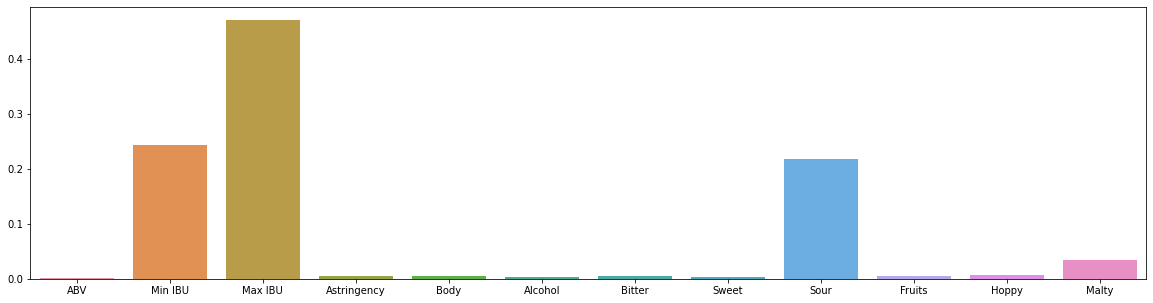

In [58]:
plt.figure(figsize=(20,5))
sns.barplot(x =df.columns.values[:-1] ,y = dt_clf.feature_importances_)

[Text(4944.940868263473, 2620.9285714285716, 'Max IBU <= 0.425\n0.663\n3747\n[682, 808, 1861, 396]'),
 Text(3434.456586826347, 2426.785714285714, 'Sour <= 0.162\n0.414\n2567\n[647, 65, 1855, 0]'),
 Text(1947.1526946107783, 2232.6428571428573, 'Max IBU <= 0.165\n0.244\n2093\n[223, 65, 1805, 0]'),
 Text(862.0598802395209, 2038.5, 'Malty <= 0.252\n0.382\n218\n[162, 0, 56, 0]'),
 Text(441.05389221556885, 1844.357142857143, 'Malty <= 0.198\n0.119\n158\n[148, 0, 10, 0]'),
 Text(160.38323353293413, 1650.2142857142858, 'Bitter <= 0.18\n0.017\n116\n[115, 0, 1, 0]'),
 Text(80.19161676646706, 1456.0714285714287, '0.0\n113\n[113, 0, 0, 0]'),
 Text(240.5748502994012, 1456.0714285714287, 'Sour <= 0.056\n0.444\n3\n[2, 0, 1, 0]'),
 Text(160.38323353293413, 1261.9285714285716, '0.0\n1\n[0, 0, 1, 0]'),
 Text(320.76646706586826, 1261.9285714285716, '0.0\n2\n[2, 0, 0, 0]'),
 Text(721.7245508982036, 1650.2142857142858, 'Astringency <= 0.063\n0.337\n42\n[33, 0, 9, 0]'),
 Text(561.3413173652694, 1456.0714285

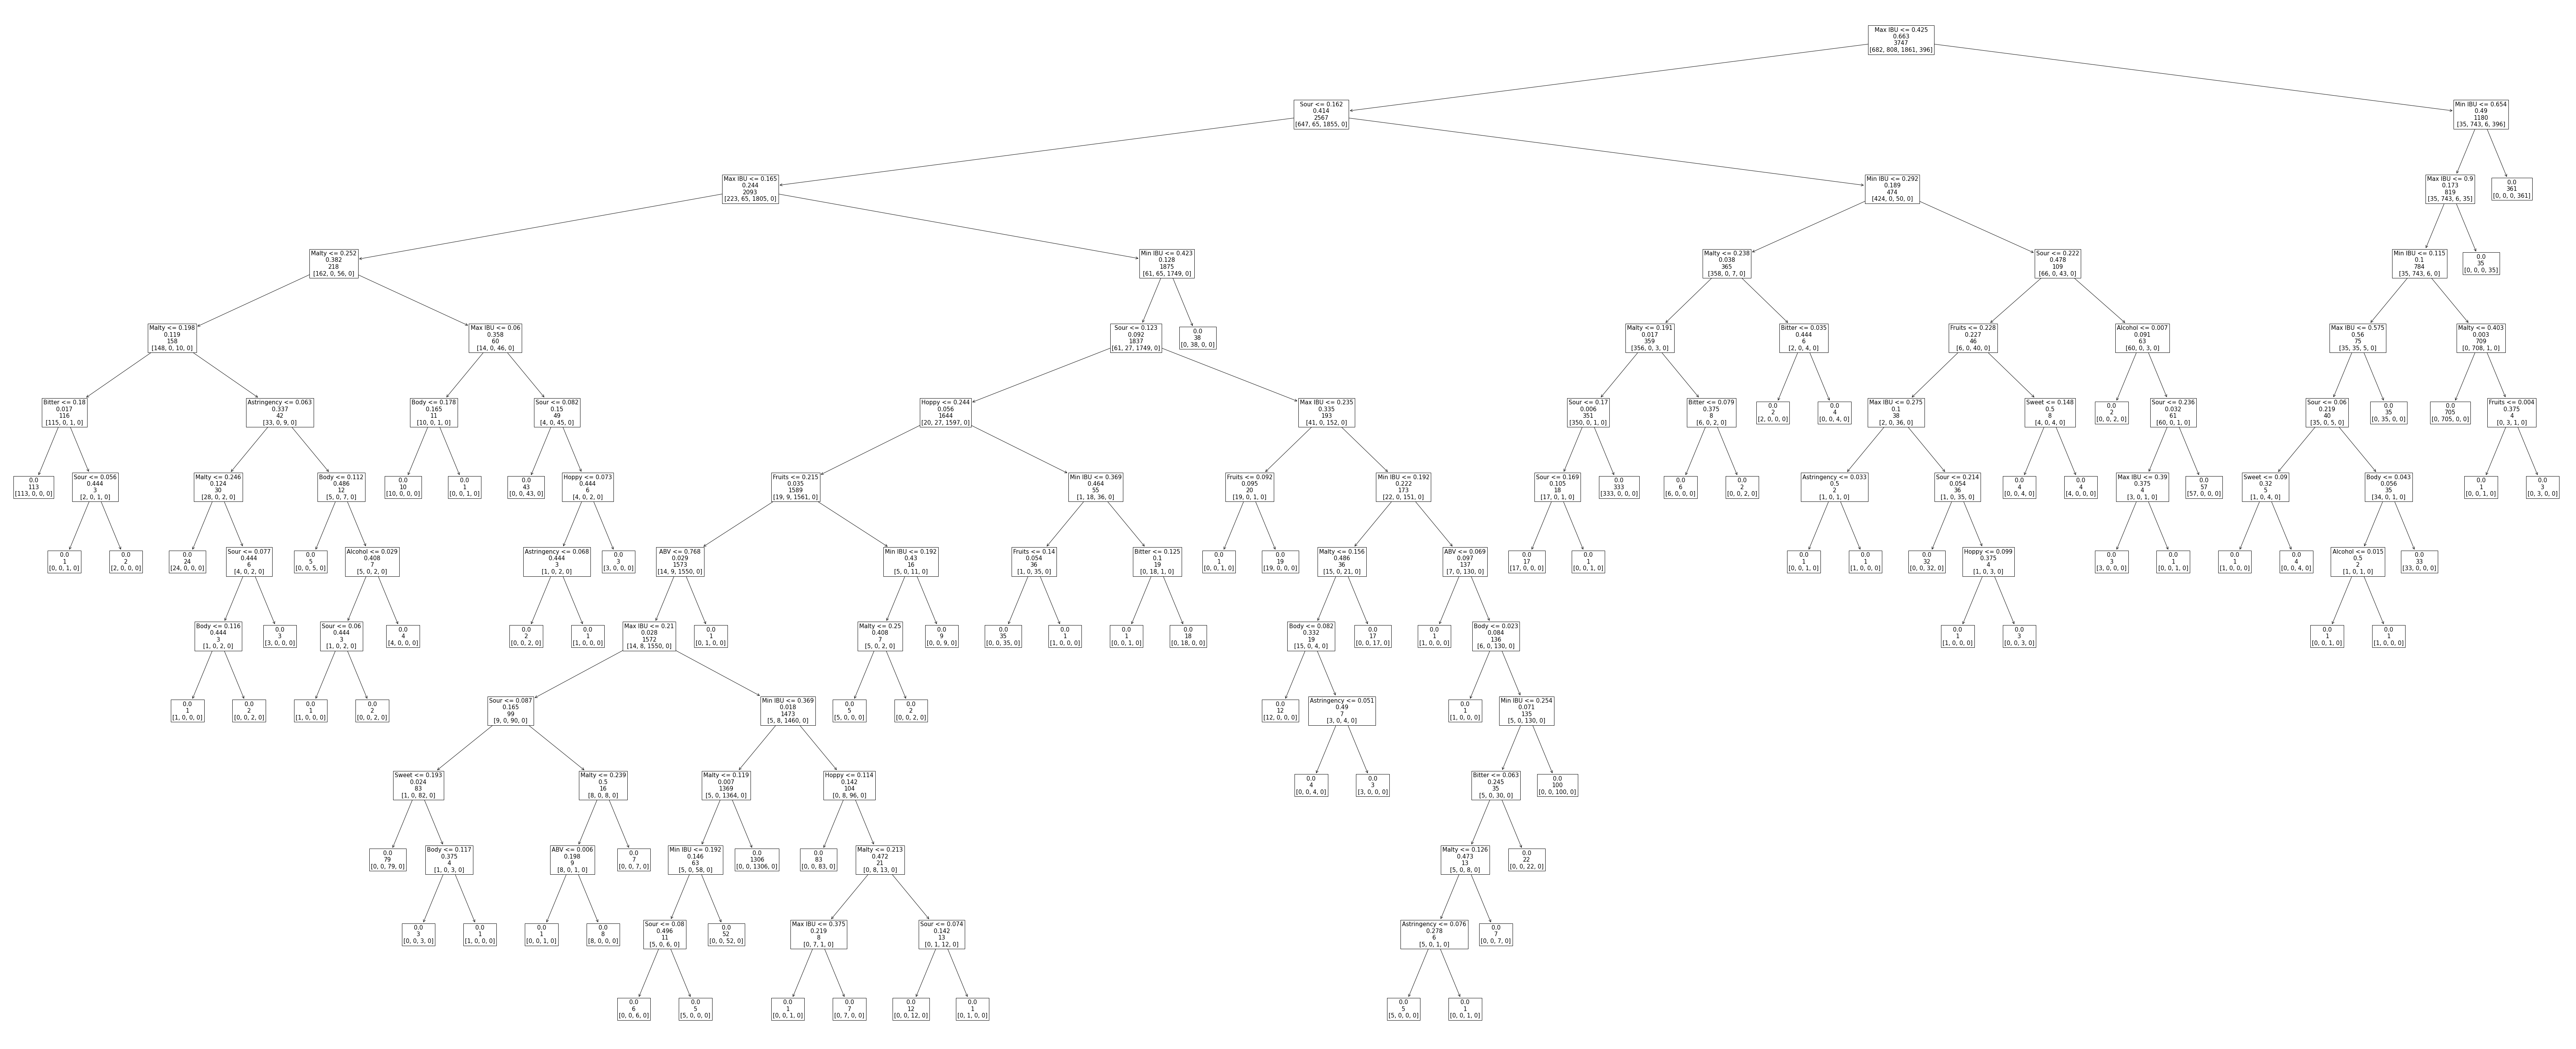

In [46]:
plt.figure(figsize=(120, 50))
plot_tree(dt_clf, feature_names=X_train.columns, fontsize=15, label="None")

In [61]:
# 3번 군집의 수가 좀 모잘라보임 3번에 맞춰서 나머지 랜덤추출

In [63]:
df.groupby('label').count().iloc[:,[1]]

,Min IBU
label,
0,1015
1,1190
2,2599
3,549


In [82]:
for i in [0,1,2,3]:
    df_temp = df.loc[df['label']==i,:]
    X = df_temp.iloc[:,:-1]
    y = df_temp.iloc[:,[-1]]
    if i == 0 :
        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=548,random_state=0)
    else :
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X,y,train_size=548,random_state=0)
        X_train = pd.concat([X_train,X_train_temp], axis = 0)
        X_test = pd.concat([X_test,X_test_temp], axis = 0)
        y_train = pd.concat([y_train,y_train_temp], axis = 0)
        y_test = pd.concat([y_test,y_test_temp], axis = 0)
X_train, X_, y_train, y_ = train_test_split(X_train,y_train, train_size=0.9, random_state=0)

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Fruits,Hoppy,Malty
5087,0.093913,0.153846,0.15,0.0299,0.0868,0.0389,0.0419,0.1108,0.1257,0.2305,0.0389,0.1856
1852,0.069565,0.276923,0.30,0.0654,0.1307,0.0098,0.1144,0.1634,0.0490,0.0490,0.1536,0.2516
4222,0.085217,0.153846,0.15,0.0459,0.0459,0.0270,0.0189,0.0378,0.4054,0.2324,0.0243,0.0649
2879,0.102609,0.307692,0.30,0.0548,0.1507,0.0000,0.0685,0.2466,0.0137,0.0685,0.0548,0.3288
5009,0.147826,0.153846,0.35,0.0356,0.0525,0.0338,0.1069,0.0750,0.2514,0.2908,0.0713,0.0769
...,...,...,...,...,...,...,...,...,...,...,...,...
4653,0.147826,0.230769,0.25,0.0180,0.2784,0.0165,0.1272,0.1677,0.0404,0.0225,0.0254,0.2964
1677,0.125217,0.769231,0.70,0.0346,0.0967,0.0072,0.1255,0.1198,0.1472,0.2670,0.1457,0.0505
5277,0.125217,0.076923,0.30,0.0802,0.0389,0.0057,0.0275,0.1019,0.3700,0.2543,0.0206,0.0745
3480,0.123478,0.538462,0.50,0.0239,0.1982,0.0495,0.1431,0.1560,0.0532,0.0514,0.0679,0.2220


In [86]:
dt_clf = dt_clf.fit(X_train, y_train)

In [89]:
dt_prediction = dt_clf.predict(X_test)

In [90]:
print(round(accuracy_score(y_test, dt_prediction), 3))
print(confusion_matrix(y_test, dt_prediction))

0.953
[[ 426    0   41    0]
 [   0  637    5    0]
 [  97    7 1947    0]
 [   0    0    0    1]]


<AxesSubplot:>

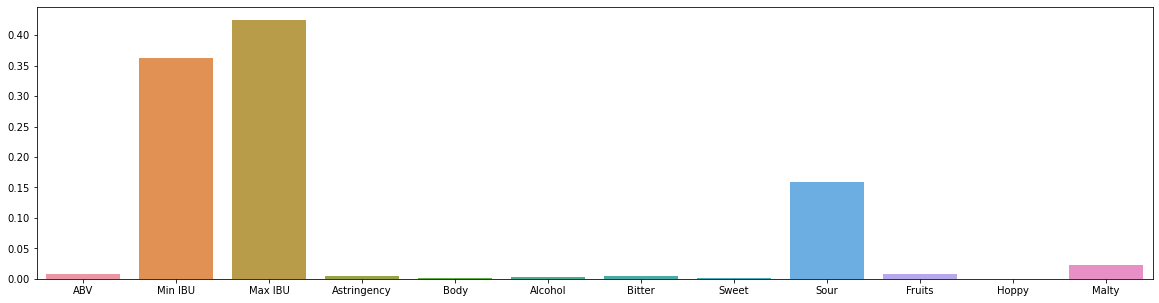

In [91]:
plt.figure(figsize=(20,5))
sns.barplot(x =df.columns.values[:-1] ,y = dt_clf.feature_importances_)

[Text(5667.1875, 2604.75, 'Min IBU <= 0.577\n0.75\n1972\n[488, 492, 491, 501]'),
 Text(4832.461956521739, 2378.25, 'Max IBU <= 0.425\n0.666\n1432\n[488, 453, 491, 0]'),
 Text(3454.141304347826, 2151.75, 'Sour <= 0.146\n0.533\n995\n[471, 35, 489, 0]'),
 Text(1613.3478260869565, 1925.25, 'Max IBU <= 0.165\n0.426\n647\n[145, 35, 467, 0]'),
 Text(630.7826086956521, 1698.75, 'Malty <= 0.269\n0.17\n128\n[116, 0, 12, 0]'),
 Text(291.1304347826087, 1472.25, 'Astringency <= 0.171\n0.036\n110\n[108, 0, 2, 0]'),
 Text(194.08695652173913, 1245.75, 'Body <= 0.249\n0.018\n109\n[108, 0, 1, 0]'),
 Text(97.04347826086956, 1019.25, '0.0\n106\n[106, 0, 0, 0]'),
 Text(291.1304347826087, 1019.25, 'Body <= 0.277\n0.444\n3\n[2, 0, 1, 0]'),
 Text(194.08695652173913, 792.75, '0.0\n1\n[0, 0, 1, 0]'),
 Text(388.17391304347825, 792.75, '0.0\n2\n[2, 0, 0, 0]'),
 Text(388.17391304347825, 1245.75, '0.0\n1\n[0, 0, 1, 0]'),
 Text(970.4347826086956, 1472.25, 'Min IBU <= 0.138\n0.494\n18\n[8, 0, 10, 0]'),
 Text(776.3478

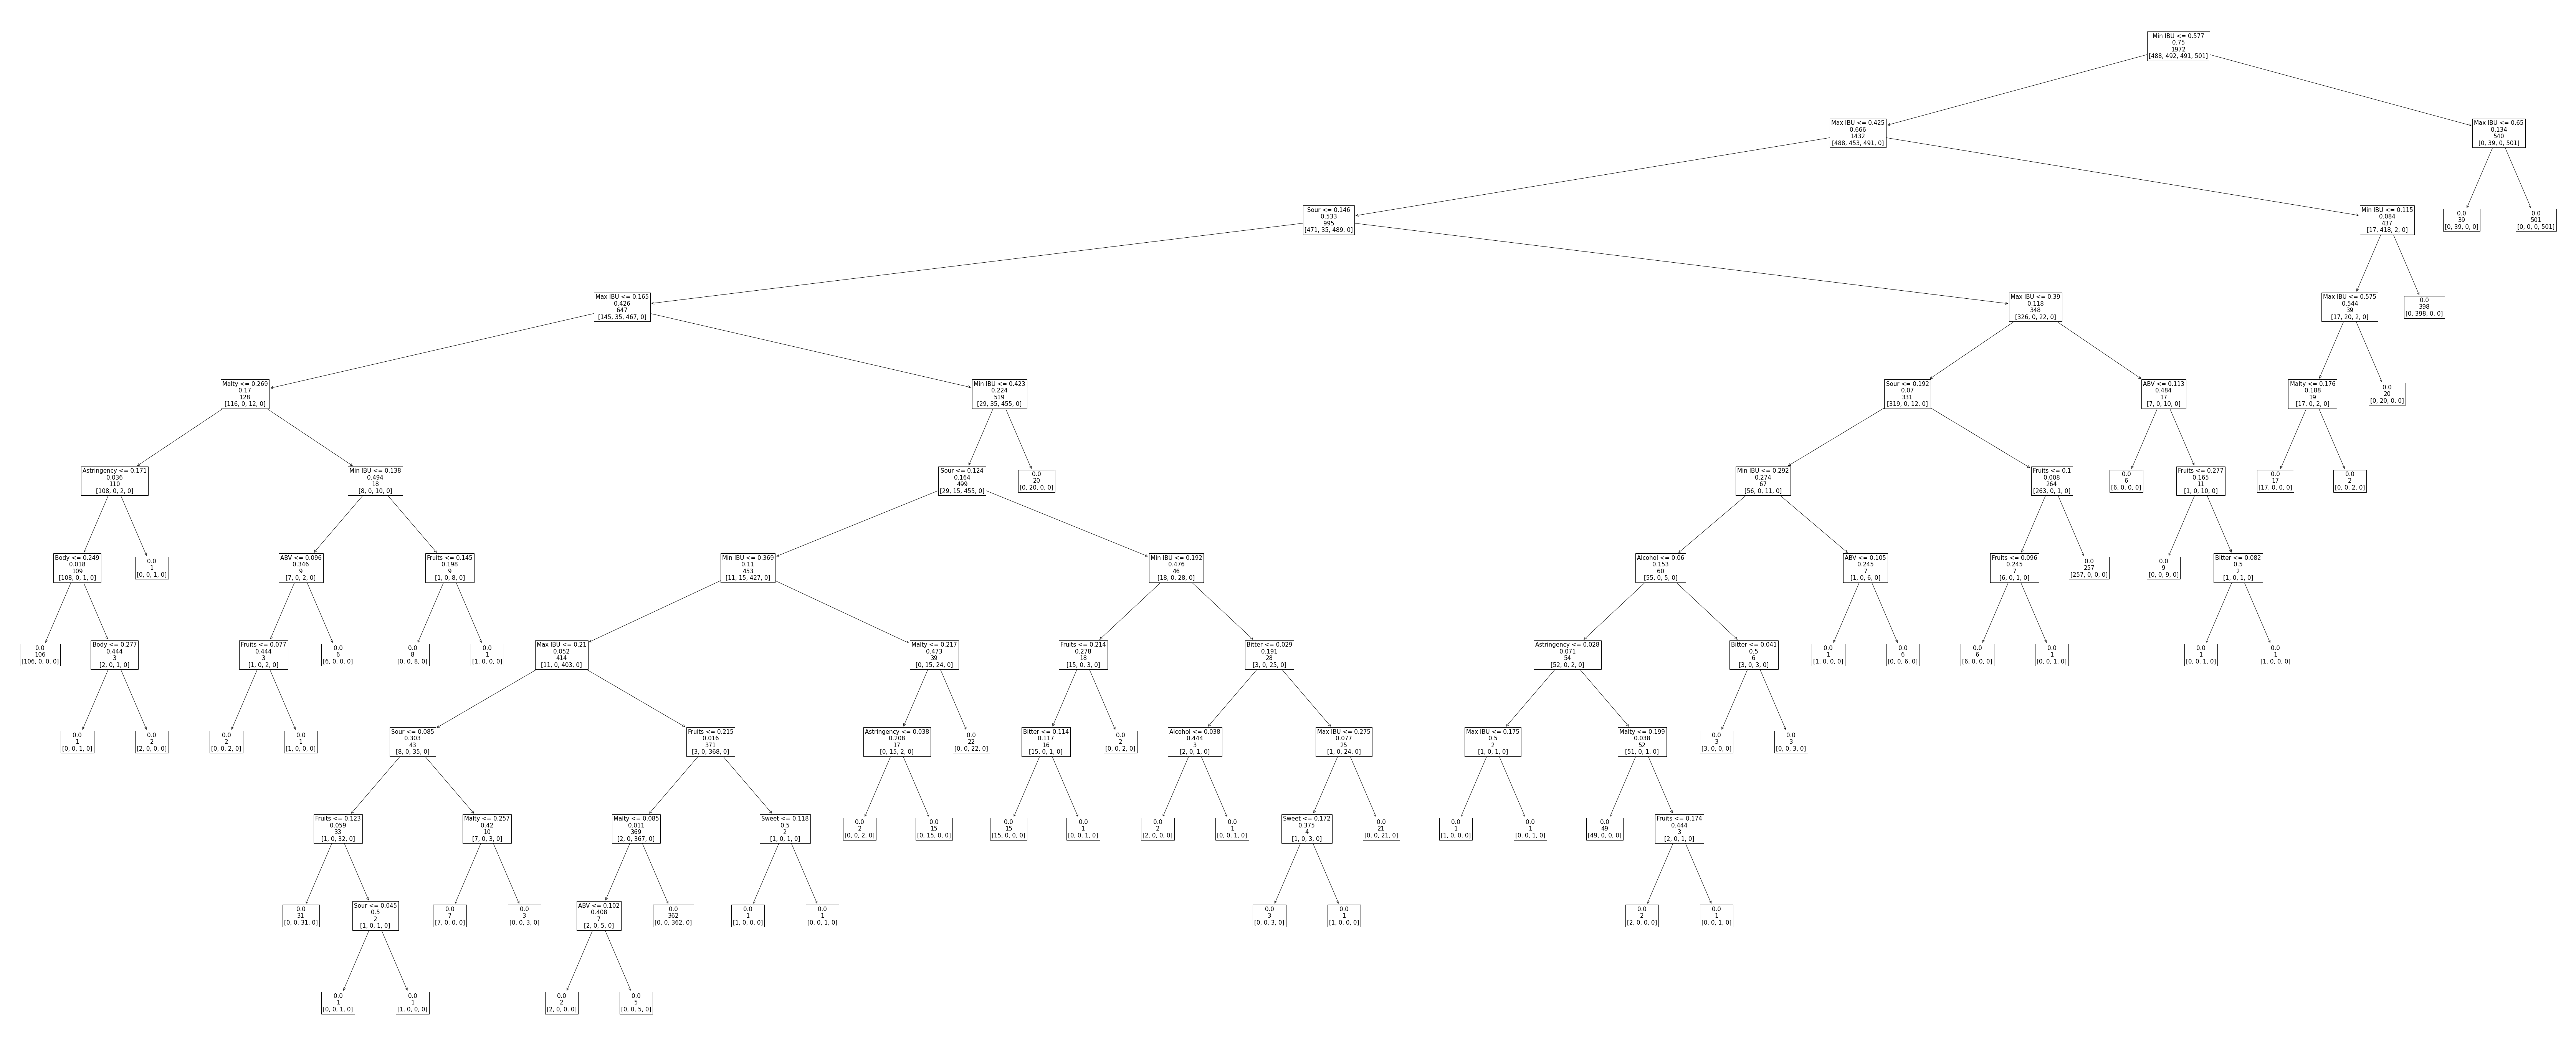

In [92]:
plt.figure(figsize=(120, 50))
plot_tree(dt_clf, feature_names=X_train.columns, fontsize=15, label="None")

In [ ]:
# 최적의 Max_deepth 찾기
#~12까지 있음

In [98]:
for i in np.arange(0,12):
    dt_clf = DecisionTreeClassifier(max_depth=i+1)
    dt_clf = dt_clf.fit(X_train, y_train)
    print('Maxdeepth : ',i+1)
    dt_prediction = dt_clf.predict(X_)
    print(round(accuracy_score(y_, dt_prediction), 3))
    print(confusion_matrix(y_, dt_prediction))  
    print()
    

Maxdeepth :  1
0.473
[[ 0  0 60  0]
 [ 0  0 51  5]
 [ 0  0 57  0]
 [ 0  0  0 47]]

Maxdeepth :  2
0.714
[[ 0  1 59  0]
 [ 0 53  3  0]
 [ 0  0 57  0]
 [ 0  0  0 47]]

Maxdeepth :  3
0.886
[[43  1 16  0]
 [ 0 53  3  0]
 [ 5  0 52  0]
 [ 0  0  0 47]]

Maxdeepth :  4
0.959
[[57  0  3  0]
 [ 0 53  3  0]
 [ 3  0 54  0]
 [ 0  0  0 47]]

Maxdeepth :  5
0.973
[[57  0  3  0]
 [ 0 56  0  0]
 [ 3  0 54  0]
 [ 0  0  0 47]]

Maxdeepth :  6
0.968
[[55  0  5  0]
 [ 0 56  0  0]
 [ 2  0 55  0]
 [ 0  0  0 47]]

Maxdeepth :  7
0.968
[[55  0  5  0]
 [ 0 56  0  0]
 [ 2  0 55  0]
 [ 0  0  0 47]]

Maxdeepth :  8
0.964
[[55  0  5  0]
 [ 0 56  0  0]
 [ 2  1 54  0]
 [ 0  0  0 47]]

Maxdeepth :  9
0.968
[[56  0  4  0]
 [ 0 56  0  0]
 [ 3  0 54  0]
 [ 0  0  0 47]]

Maxdeepth :  10
0.968
[[56  0  4  0]
 [ 0 56  0  0]
 [ 3  0 54  0]
 [ 0  0  0 47]]

Maxdeepth :  11
0.968
[[57  0  3  0]
 [ 0 56  0  0]
 [ 4  0 53  0]
 [ 0  0  0 47]]

Maxdeepth :  12
0.968
[[57  0  3  0]
 [ 0 56  0  0]
 [ 4  0 53  0]
 [ 0  0  0 47]]



In [99]:
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf = dt_clf.fit(X_train, y_train)

<AxesSubplot:>

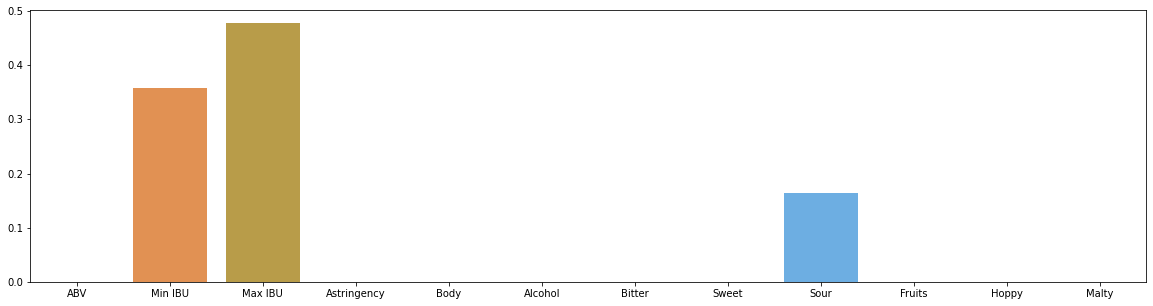

In [100]:
plt.figure(figsize=(20,5))
sns.barplot(x =df.columns.values[:-1] ,y = dt_clf.feature_importances_)

In [ ]:
#4 개의 군집화의 경우 IBU값, Sour 값이 중요한것으로 인식된다. - 일반화
#1번 군집 특징: MAX IBU <= 0.425 & Sour > 0.146 || - 신맛이 나는 쓰지않은 맥주
#2번 군집 특징: MAX IBU < 0.577 & MIN IBU < 0.115 - 표준화된 쓴맛이 두번쨰로 강함
#3번 군집 특징: 0.165 < MAX IBU < 0.577 & Sour <= 0.146 - 신맛이 나지않은 쓰지않은 맥주
#4번 군집 특징: 0.577 < MAX IBU < 0.65 - 표준화된 쓴맛이 제일 강함.

[Text(1124.71875, 489.24, 'Min IBU <= 0.577\n0.75\n1972\n[488, 492, 491, 501]'),
 Text(784.6875, 380.52000000000004, 'Max IBU <= 0.425\n0.666\n1432\n[488, 453, 491, 0]'),
 Text(418.5, 271.8, 'Sour <= 0.146\n0.533\n995\n[471, 35, 489, 0]'),
 Text(209.25, 163.08000000000004, 'Max IBU <= 0.165\n0.426\n647\n[145, 35, 467, 0]'),
 Text(104.625, 54.360000000000014, '0.17\n128\n[116, 0, 12, 0]'),
 Text(313.875, 54.360000000000014, '0.224\n519\n[29, 35, 455, 0]'),
 Text(627.75, 163.08000000000004, 'Max IBU <= 0.39\n0.118\n348\n[326, 0, 22, 0]'),
 Text(523.125, 54.360000000000014, '0.07\n331\n[319, 0, 12, 0]'),
 Text(732.375, 54.360000000000014, '0.484\n17\n[7, 0, 10, 0]'),
 Text(1150.875, 271.8, 'Min IBU <= 0.115\n0.084\n437\n[17, 418, 2, 0]'),
 Text(1046.25, 163.08000000000004, 'Max IBU <= 0.575\n0.544\n39\n[17, 20, 2, 0]'),
 Text(941.625, 54.360000000000014, '0.188\n19\n[17, 0, 2, 0]'),
 Text(1150.875, 54.360000000000014, '0.0\n20\n[0, 20, 0, 0]'),
 Text(1255.5, 163.08000000000004, '0.0\n398\

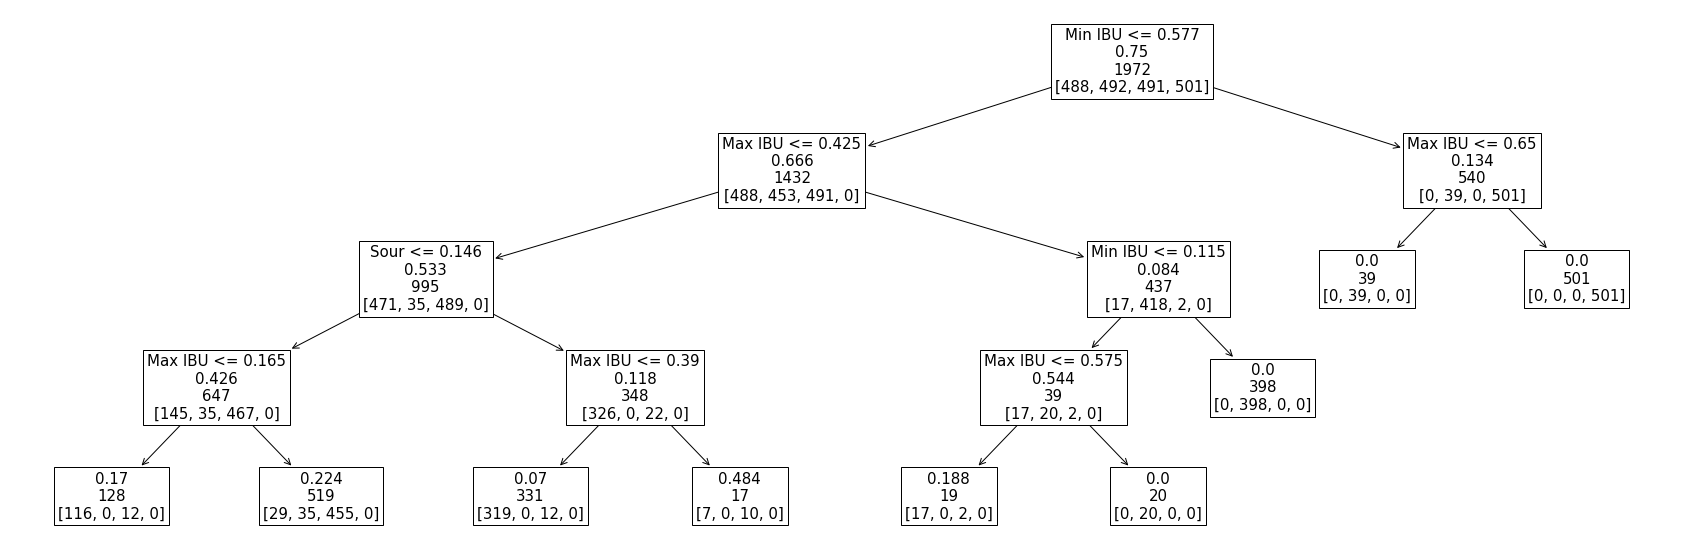

In [104]:
plt.figure(figsize=(30, 10))
plot_tree(dt_clf, feature_names=X_train.columns, fontsize=15, label="None")